<a href="https://colab.research.google.com/github/chemaoxfz/bi23/blob/main/202205_UCSD_Jun_course_homework_reaction_order_sampling_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
# Plotting modules and settings.
import matplotlib.pyplot as plt
import seaborn as sns
colors = ('#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
          '#bcbd22', '#17becf')
sns.set(style='ticks', palette=colors)

sns.set_context('talk',font_scale=2,rc={'lines.linewidth':3})

# The following is specific Jupyter notebooks
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}


Let's see whether the linear derivatives also sample nicely to form some polyhedral shape.

## The function that computes the log derivative in general.
### You could specify \\(L\\) and \\(N\\) matrices directly, or use l_from_n function to compute \\(L\\) from \\(N\\).

In [2]:
def log_der_calc(x,l_mat,n_mat):
  #given x, L and N, return the log derivative
  t_inv = 1/(l_mat.dot(x))
  temp=l_mat*x
  upper=(temp.T*t_inv).T
  logder_inv=np.concatenate((upper,n_mat),axis=0)
  return np.linalg.inv(logder_inv)

def l_from_n(n_mat):
  #given N matrix, return L matrix. 
  #Assume species ordered so that the atomic species come first.
  r=n_mat.shape[0]
  d=n_mat.shape[1]-r
  n1_mat=n_mat[:,:d]
  n2_mat=n_mat[:,-r:]
  l2_mat=-(n1_mat.T).dot(np.linalg.inv(n2_mat).T)
  l_mat=np.concatenate((np.eye(d),l2_mat),axis=1)
  return l_mat


Sampling the reaction orders of \\(C\\) in \\(t_E\\) and \\(t_S\\) in the simple binding reaction \\(E+S \rightleftharpoons C\\).

Order of the species is \\((E,S,C)\\), order of the totals is \\((t_E,t_S)\\).

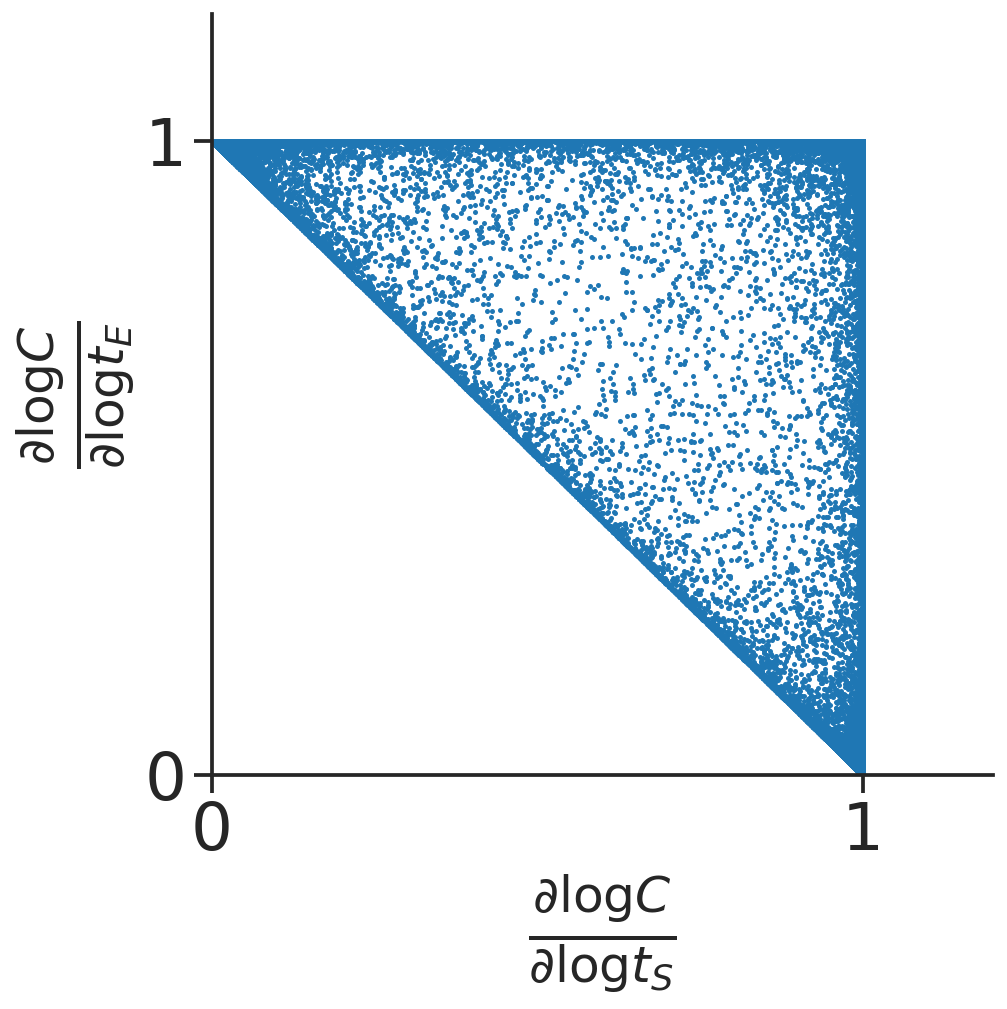

In [ ]:
l_mat=np.array([[1,0,1],
                [0,1,1]])
n_mat=np.array([[-1,-1,1]])
d_dim,n_dim=l_mat.shape

n_pts=100000
x_min_log10=-6
x_max_log10=6
xx=10**(np.random.rand(n_pts,n_dim)*(x_max_log10 - x_min_log10)+x_min_log10)
logders=np.zeros([n_pts,n_dim,n_dim]) # 2nd index is species, 3rd index is total and k.

for i in range(n_pts):
  logders[i]=log_der_calc(xx[i],l_mat,n_mat)

sns.set_context('talk',font_scale=2,rc={'lines.linewidth':3})

fig, ax = plt.subplots(1, 1,figsize=(7,7))
ax.scatter(logders[:,2,1],logders[:,2,0],s=1)
ax.set_xlabel(r'$\frac{\partial \log C}{\partial \log t_S}$')
ax.set_ylabel(r'$\frac{\partial \log C}{\partial \log t_E}$')

#remove top and right borders
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#restrict number of ticks
plt.locator_params(axis='x', nbins=2)
plt.locator_params(axis='y', nbins=2)

ax.set_xlim([0,1.2])
ax.set_ylim([0,1.2])
handles, labels = ax.get_legend_handles_labels()

## Below are commands that saves and then downloads the figure from google colab
# plt.savefig('C-log-der-tE-tS-sampling.svg', bbox_inches='tight')
# from google.colab import files
# files.download('C-log-der-tE-tS-sampling.svg') 

Without re-simulating, we can take the points simulated from above and plot the reaction order of \\(E\\) in \\(t_E, t_S\\).

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

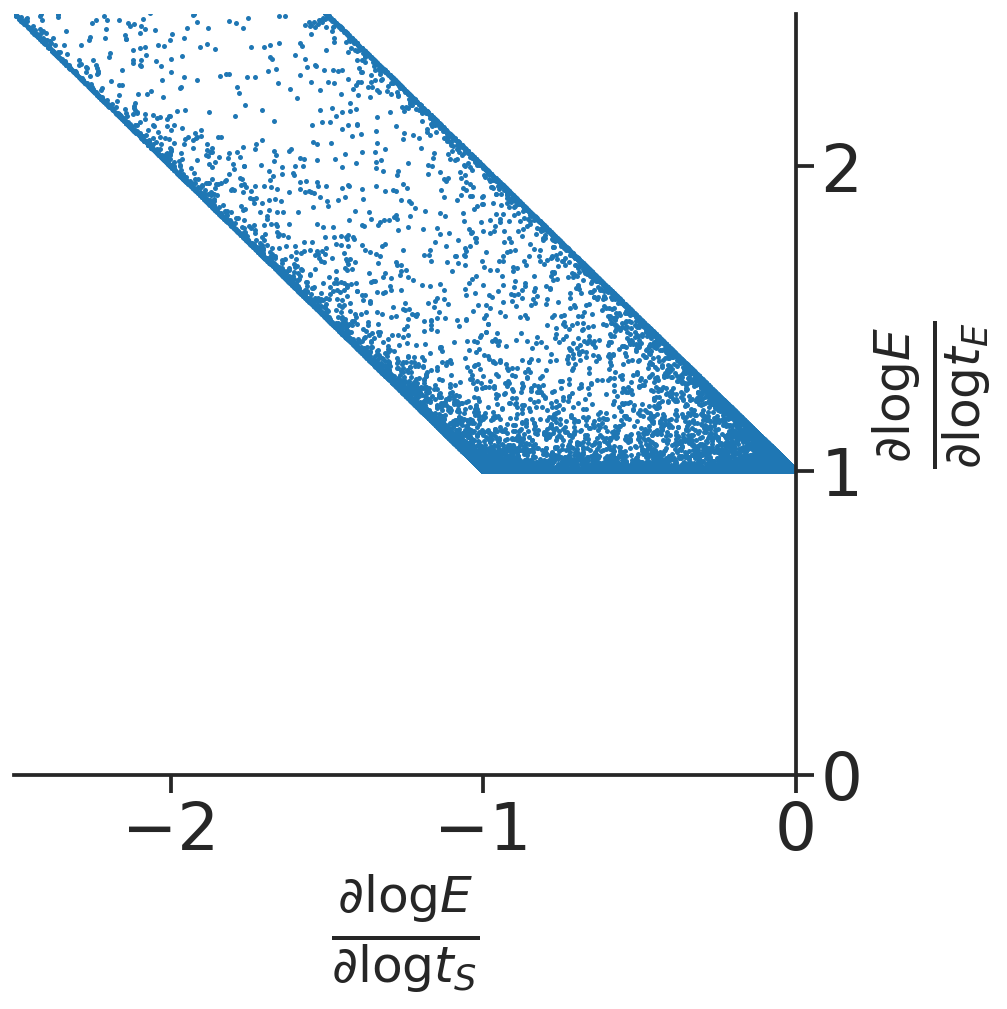

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(7,7))
ax.scatter(logders[:,0,1],logders[:,0,0],s=1)
ax.set_xlabel(r'$\frac{\partial \log E}{\partial \log t_S}$')
ax.set_ylabel(r'$\frac{\partial \log E}{\partial \log t_E}$')


#remove top and right borders
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.yaxis.set_ticks_position('right')
ax.yaxis.set_label_position('right') 
ax.set_xlim([-2.5,0])
ax.set_ylim([0,2.5])
plt.locator_params(axis='x', nbins=3)
plt.locator_params(axis='y', nbins=3)

handles, labels = ax.get_legend_handles_labels()
## Below are commands that saves and then downloads the figure from google colab
plt.savefig('E-log-der-tE-tS-sampling.png', bbox_inches='tight')
# from google.colab import files #This is the code you use to download the figure
# files.download('E-log-der-tE-tS-sampling.pdf') 

## Induced activator.
A transcription factor activator \\(R\\) induced by inducer \\(S\\), and activates gene \\(G\\). 

Binding reactions are \\(R+S \rightleftharpoons C_{RS}\\), \\(G+C_{RS} \rightleftharpoons C_{GRS}\\).

Order species by \\((G,R,S,C_{RS},C_{GRS})\\). 

Stoichiometry matrix is
\\(N = \begin{bmatrix} 0 & -1 & -1 & 1 & 0 \\ -1 & 0 & 0 & -1 & 1 \end{bmatrix}\\).

Order totals by \\((t_G,t_R,t_S)\\).

Conservation law matrix is
\\(L = \begin{bmatrix} 1 & 0 & 0 & 0 & 1 \\ 0 & 1 & 0 & 1 & 1 \\ 0 & 0 & 1 & 1 & 1 \end{bmatrix}\\).

In [ ]:
n_mat=np.array([[0,-1,-1,1,0],
                [-1,0,0,-1,1]])
l_mat=l_from_n(n_mat)

In [ ]:
d_dim,n_dim=l_mat.shape

n_pts=100000
x_min_log10=-6
x_max_log10=6
xx=10**(np.random.rand(n_pts,n_dim)*(x_max_log10 - x_min_log10)+x_min_log10)
logders=np.zeros([n_pts,n_dim,n_dim])
for i in range(n_pts):
  logders[i]=log_der_calc(xx[i],l_mat,n_mat)

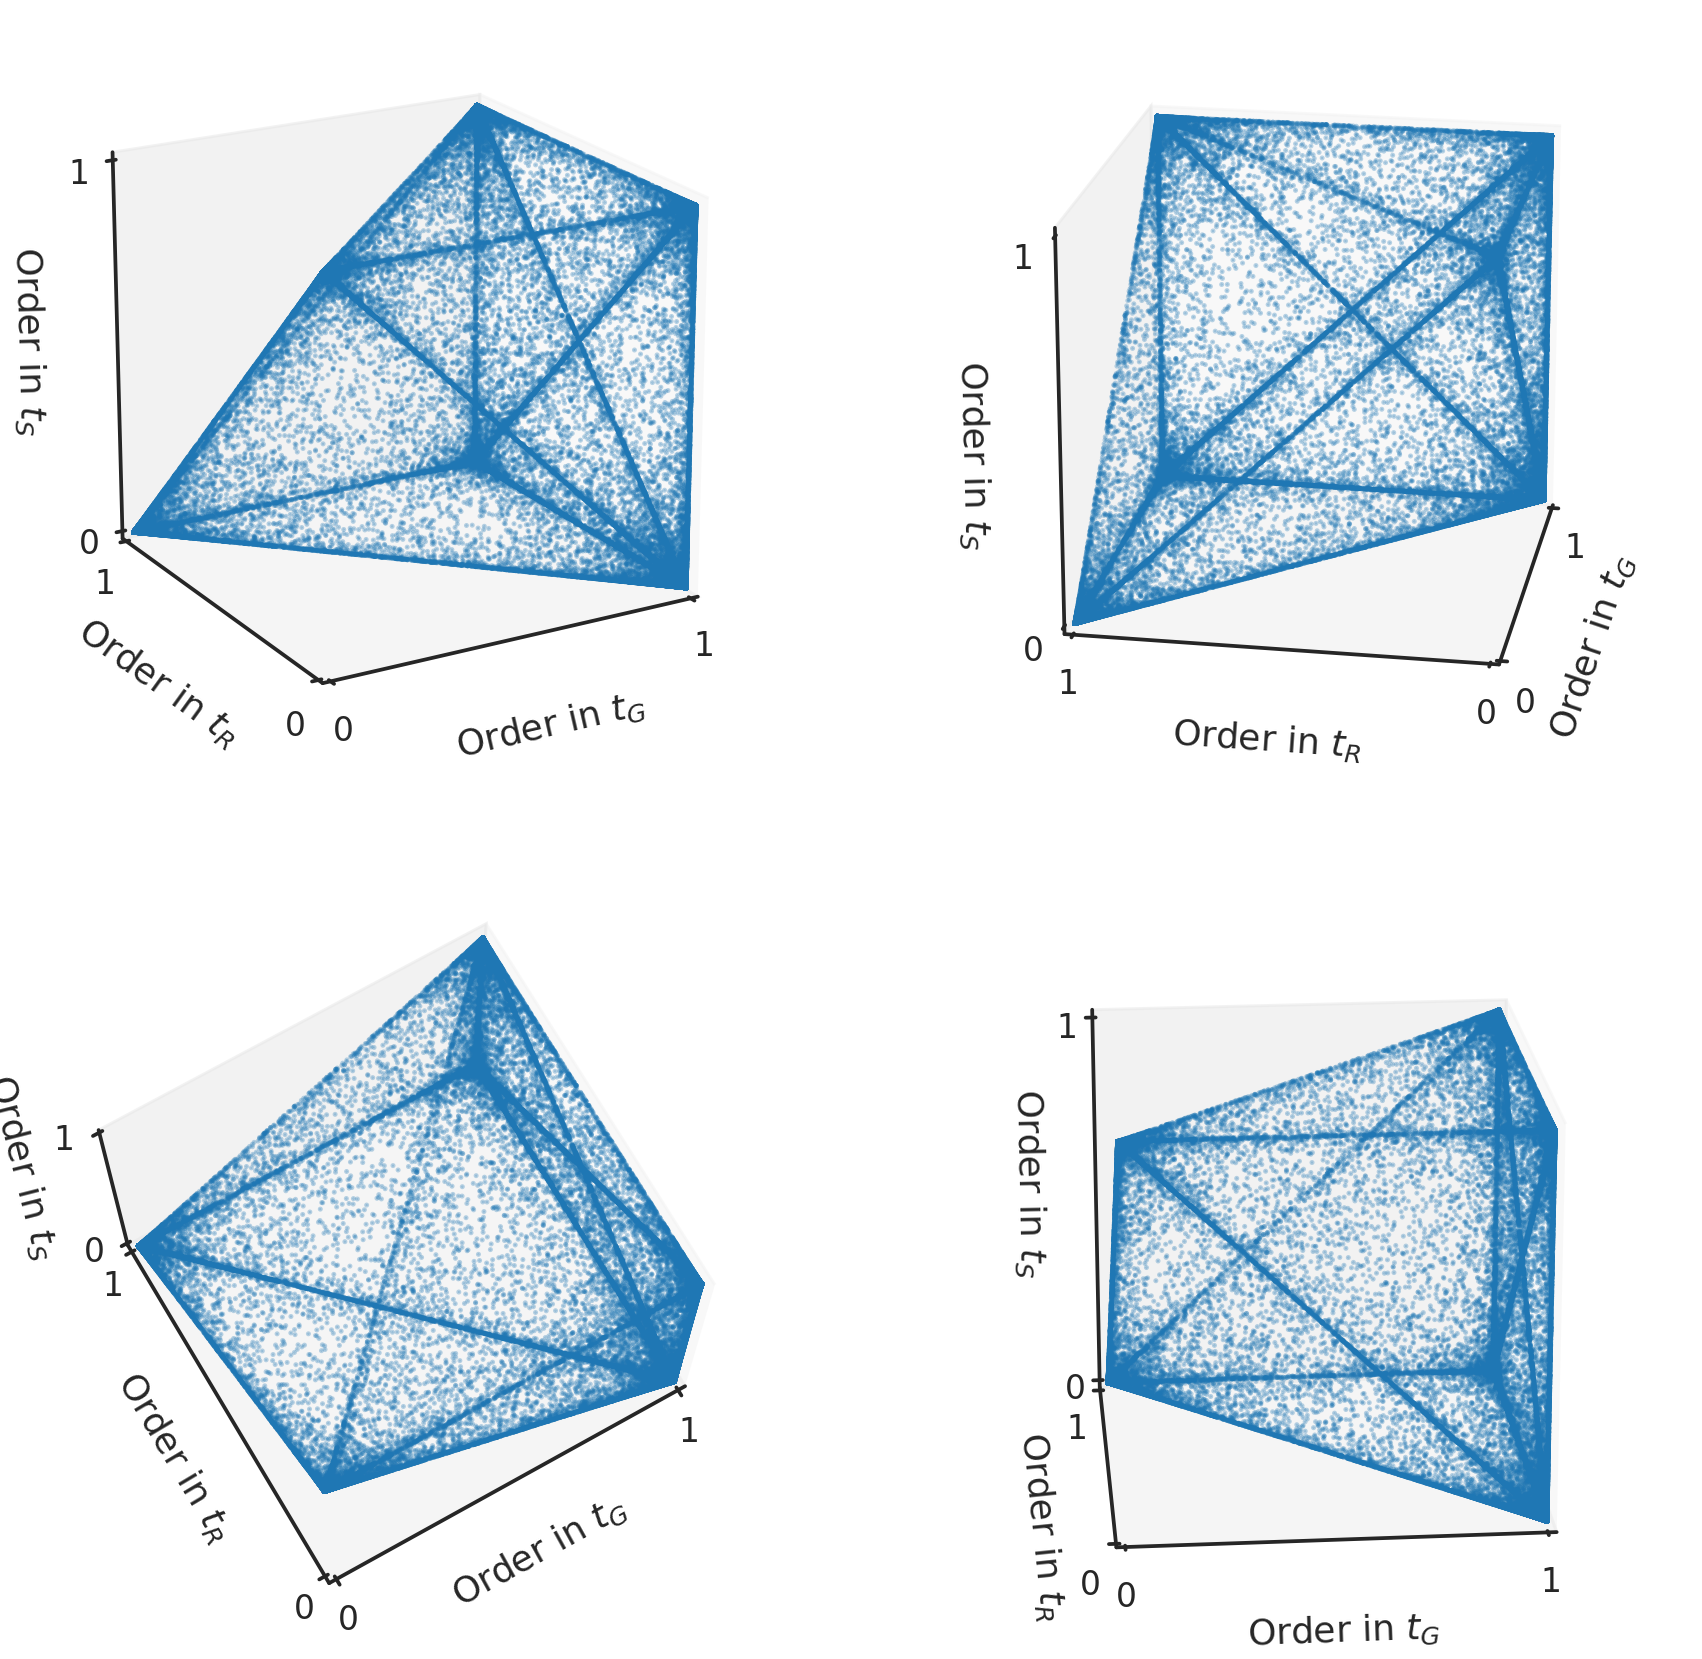

In [ ]:

sns.set_context('talk',font_scale=1,rc={'lines.linewidth':3})

fig = plt.figure(figsize=(15,15))

c_idx=4 #index for the active complex to be plotted.

xmin=0; xmax=1; 
ymin=0; ymax=1; 
zmin=0; zmax=1; 


c_label='C_{GRS}'

x_label='t_G'
y_label='t_R'
z_label='t_S'

views=[(20,-120),(20,-170),(75,-120),(20,-95)]

nn=100000

for i in range(4):
  ax = fig.add_subplot(2, 2, i+1, projection='3d')
  ax.scatter(logders[:nn,c_idx,0],logders[:nn,c_idx,1],logders[:nn,c_idx,2],s=1,alpha=0.3)
  ax.set_xlabel(r'Order in $'+x_label+'$')
  ax.set_ylabel(r'Order in $'+y_label+'$')
  ax.set_zlabel(r'Order in $'+z_label+'$')
  ax.set_xlim([xmin,xmax])
  ax.set_ylim([ymin,ymax])
  ax.set_zlim([zmin,zmax])

  #remove top and right borders
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  #restrict number of ticks

  plt.locator_params(axis='x', nbins=1)
  plt.locator_params(axis='y', nbins=1)
  plt.locator_params(axis='z', nbins=1)

  ax.xaxis.labelpad = 10
  ax.yaxis.labelpad = 10
  ax.zaxis.labelpad = 10

  view=views[i]
  ax.view_init(view[0],view[1])

  ax.grid(False)
plt.savefig('induced-activator-sampling.png', dpi=600, bbox_inches='tight')

This is the code you use if you want to download the figure generated.

In [ ]:
from google.colab import files
files.download('induced-activator-sampling.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Here we investigate the various cases of binding to several substrates. 
(1) simple one step binding, \\(E_0+nS \rightleftharpoons E_n\\).

Order: \\((E_0,S,E_n)\\), \\((t_S,t_E)\\).

This case has \\(N = \begin{bmatrix} -1 & -n & 1 \end{bmatrix}\\), \\(L = \begin{bmatrix} 0 & 1 & n \\ 1 & 0 & 1 \end{bmatrix}\\).

In [7]:
param_n=2

l_mat=np.array([[0,1,param_n],
                [1,0,1]])
n_mat=np.array([[1,param_n,-1]])
d_dim,n_dim=l_mat.shape

n_pts=50000
x_min_log10=-6
x_max_log10=6
xx=10**(np.random.rand(n_pts,n_dim)*(x_max_log10 - x_min_log10)+x_min_log10)
logders=np.zeros([n_pts,n_dim,n_dim])
for i in range(n_pts):
  logders[i]=log_der_calc(xx[i],l_mat,n_mat)

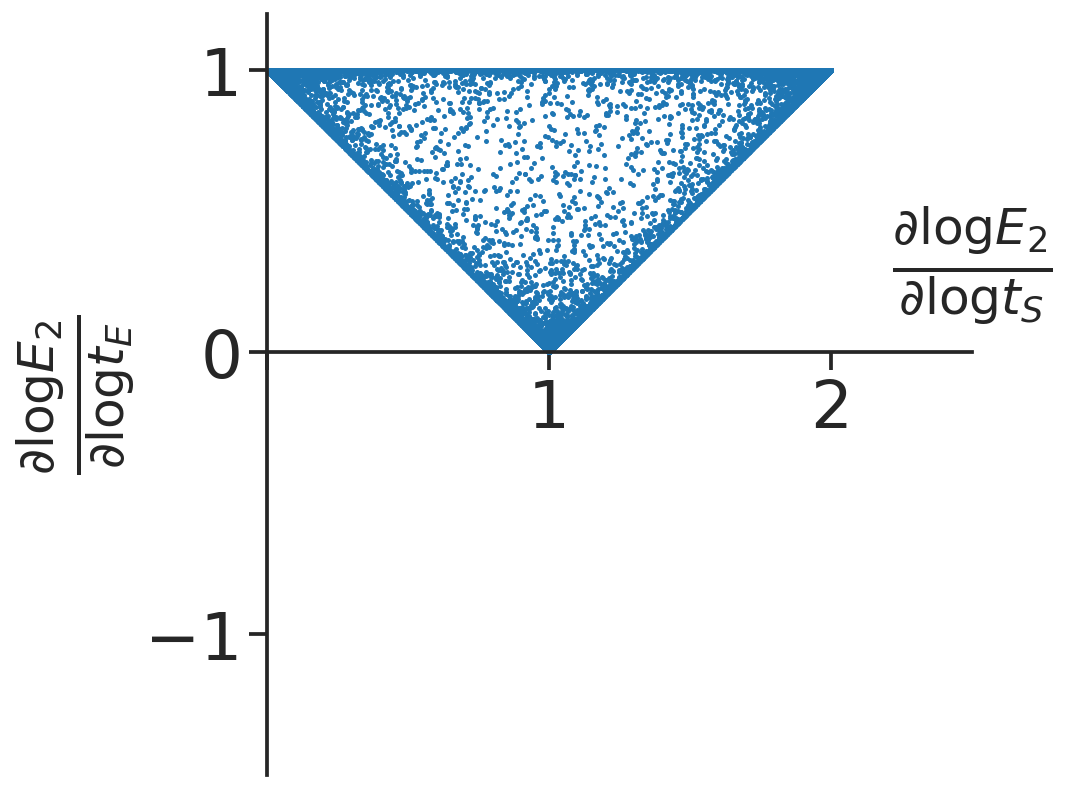

In [8]:
sns.set_context('talk',font_scale=2,rc={'lines.linewidth':3})

fig, ax = plt.subplots(1, 1,figsize=(7,7))
ax.set_aspect('equal')
ax.scatter(logders[:,2,0],logders[:,2,1],s=1,color=colors[0])
ax.set_xlabel(r'$\frac{\partial \log E_2}{\partial \log t_S}$')
ax.xaxis.set_label_coords(1, .75)
ax.set_ylabel(r'$\frac{\partial \log E_2}{\partial \log t_E}$')

xmin=0; xmax=2.5; ax.set_xlim([xmin,xmax])
ymin=-1.5; ymax=1.2; ax.set_ylim([ymin,ymax])

#remove top and right borders
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#restrict number of ticks
plt.locator_params(axis='x', nbins=int(xmax-xmin)+1)
plt.locator_params(axis='y', nbins=int(ymax-ymin)+1)

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.xaxis.set_ticklabels(['',1,2])

handles, labels = ax.get_legend_handles_labels()
plt.savefig('enzyme-allostery-logder-sampling-direct.png', dpi=200, bbox_inches='tight')

Second case. (2) group binding, \\(nS \rightleftharpoons S_n\\), \\(E_0+S_n \rightleftharpoons E_n\\).
Order species by \\((E_0,S,S_n,E_n)\\), order totals by \\((t_S,t_E)\\).
This case has \\(N = \begin{bmatrix} -1 & 0 & -1 & 1 \\ 0 & -n & 1 & 0 \end{bmatrix}\\), \\(L = \begin{bmatrix} 0 & 1 & n & n \\ 1 & 0 & 0 & 1 \end{bmatrix}\\).

In [12]:
param_n=2

l_mat=np.array([[0,1,param_n,param_n],
                [1,0,0,1]])
n_mat=np.array([[-1,0,-1,1],
                [0,-param_n,1,0]])
d_dim,n_dim=l_mat.shape

n_pts=50000
x_min_log10=-6
x_max_log10=6
xx=10**(np.random.rand(n_pts,n_dim)*(x_max_log10 - x_min_log10)+x_min_log10)
logders=np.zeros([n_pts,n_dim,n_dim])
for i in range(n_pts):
  logders[i]=log_der_calc(xx[i],l_mat,n_mat)

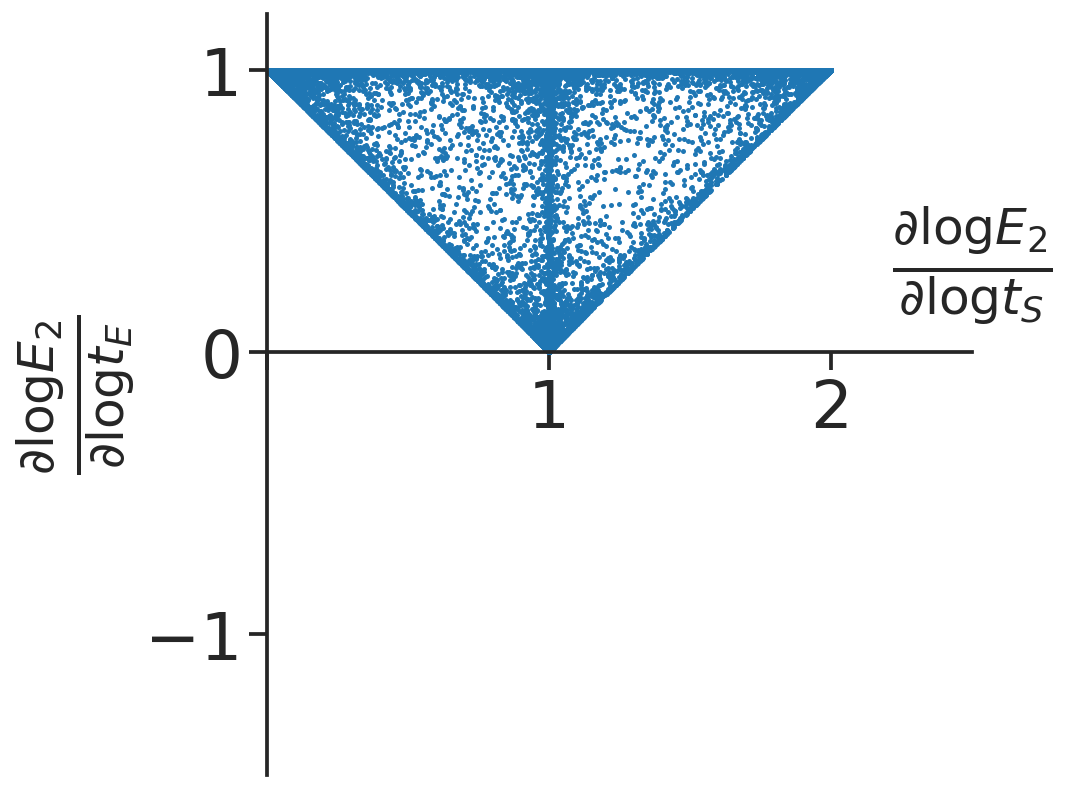

In [14]:
sns.set_context('talk',font_scale=2,rc={'lines.linewidth':3})

fig, ax = plt.subplots(1, 1,figsize=(7,7))
ax.set_aspect('equal')
ax.scatter(logders[:,3,0],logders[:,3,1],s=1,color=colors[0])
ax.set_xlabel(r'$\frac{\partial \log E_2}{\partial \log t_S}$')
ax.xaxis.set_label_coords(1, .75)
ax.set_ylabel(r'$\frac{\partial \log E_2}{\partial \log t_E}$')

xmin=0; xmax=2.5; ax.set_xlim([xmin,xmax])
ymin=-1.5; ymax=1.2; ax.set_ylim([ymin,ymax])

#remove top and right borders
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#restrict number of ticks
plt.locator_params(axis='x', nbins=int(xmax-xmin)+1)
plt.locator_params(axis='y', nbins=int(ymax-ymin)+1)

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.xaxis.set_ticklabels(['',1,2])

handles, labels = ax.get_legend_handles_labels()
# plt.savefig('enzyme-allostery-logder-sampling-direct.png', dpi=200, bbox_inches='tight')